This notebook is part of the `nbsphinx` documentation: https://nbsphinx.readthedocs.io/.

# Markdown Cells

We can use *emphasis*, **boldface**, `preformatted text`.

> It looks like strike-out text is not supported: ~~strikethrough~~.

* Red
* Green
* Blue

***

1. One
1. Two
1. Three

Arbitrary Unicode characters should be supported, e.g. łßō.
Note, however, that this only works if your HTML browser and your LaTeX processor provide the appropriate fonts.

## Equations

Inline equations like $\text{e}^{i\pi} = -1$
can be created by putting a LaTeX expression between two dollar signs, like this:
`$\text{e}^{i\pi} = -1$`.

<div class="alert alert-info">

Note

Avoid leading and trailing spaces around math expressions, otherwise errors like the following will occur when Sphinx is running:

    ERROR: Unknown interpreted text role "raw-latex".

See also the [pandoc docs](https://pandoc.org/MANUAL.html#math):

> Anything between two `$` characters will be treated as TeX math. The opening `$` must have a non-space character immediately to its right, while the closing `$` must have a non-space character immediately to its left, and must not be followed immediately by a digit.

</div>

Equations can also be displayed on their own line like this:
\begin{equation}
\int\limits_{-\infty}^\infty f(x) \delta(x - x_0) dx = f(x_0).
\end{equation}

This can be done by simply using one of the LaTeX math environments, like so:

```
\begin{equation}
\int\limits_{-\infty}^\infty f(x) \delta(x - x_0) dx = f(x_0)
\end{equation}
```

<div class="alert alert-info">

Note

For equations to be shown in HTML output,
you have to specify a
[math extension](https://www.sphinx-doc.org/en/master/usage/extensions/math.html)
in your [extensions](usage.ipynb#extensions) setting, e.g.:

```python
extensions = [
    'nbsphinx',
    'sphinx.ext.mathjax',
    # ... other useful extensions ...
]
```

</div>

### Automatic Equation Numbering

This is not automatically enabled in Jupyter notebooks,
but you can install a notebook extension in order to enable equation numbering:
https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/nbextensions/equation-numbering/readme.html.

Automatic Equation Numbering is enabled on https://nbviewer.jupyter.org/,
see e.g. the latest version of this very notebook at the link https://nbviewer.jupyter.org/github/spatialaudio/nbsphinx/blob/master/doc/markdown-cells.ipynb#Automatic-Equation-Numbering.

When using `nbsphinx`, you can use the following `mathjax_config` setting in your `conf.py` file
to enable automatic equation numbering in HTML output.
In LaTeX output, the equations are numbered by default.

```python
mathjax_config = {
    'TeX': {'equationNumbers': {'autoNumber': 'AMS', 'useLabelIds': True}},
}
```

You can use `\label{...}` to give a unique label to an equation:

\begin{equation}
\phi = \frac{1 + \sqrt{5}}{2}
\label{golden-mean}
\end{equation}

```
\begin{equation}
\phi = \frac{1 + \sqrt{5}}{2}
\label{golden-mean}
\end{equation}
```

If automatic equation numbering is enabled,
you can later reference that equation using its label.
You can use `\eqref{golden-mean}` for a reference with parentheses: \eqref{golden-mean},
or `\ref{golden-mean}` for a reference without them: \ref{golden-mean}.

In HTML output, these equation references only work for equations within a single HTML page.
In LaTeX output, equations from other notebooks can be referenced, e.g. \eqref{fibonacci-recurrence}.

### Manual Equation Numbering

If you prefer to assign equation numbers (or some kind of names) manually,
you can do so with `\tag{...}`:

\begin{equation}
a^2 + b^2 = c^2
\tag{99.4}
\label{pythagoras}
\end{equation}

```
\begin{equation}
a^2 + b^2 = c^2
\tag{99.4}
\label{pythagoras}
\end{equation}
```

The above equation has the number \ref{pythagoras}.

## Citations

According to https://nbconvert.readthedocs.io/en/latest/latex_citations.html,
`nbconvert` supports citations using a special HTML-based syntax.
`nbsphinx` supports the same syntax.

Example: <cite data-cite="kluyver2016jupyter">Kluyver et al. (2016)</cite>.

```html
<cite data-cite="kluyver2016jupyter">Kluyver et al. (2016)</cite>
```

You don't actually have to use `<cite>`,
any inline HTML tag can be used, e.g. `<strong>`:
<strong data-cite="perez2011python">Python: An Ecosystem for Scientific Computing</strong>.

```html
<strong data-cite="perez2011python">Python: An Ecosystem for Scientific Computing</strong>
```

You'll also have to define a list of references,
see [the section about references](a-normal-rst-file.rst#references).

There is also a Notebook extension which may or may not be useful: https://github.com/takluyver/cite2c.

## Code

We can also write code with nice syntax highlighting:

```python3
print("Hello, world!")
```

## Tables

A     | B     | A and B
------|-------|--------
False | False | False
True  | False | False
False | True  | False
True  | True  | True

## Images

Local image: ![Jupyter notebook icon](images/notebook_icon.png)

    ![Jupyter notebook icon](images/notebook_icon.png)

Remote image: ![Python logo (remote)](https://www.python.org/static/img/python-logo-large.png)

    ![Python logo (remote)](https://www.python.org/static/img/python-logo-large.png)

### Using the HTML `<img>` tag

The aforementioned Markdown syntax for including images
doesn't allow specifying the image size.

If you want to control the size of the included image,
you can use the HTML
[\<img\>](https://www.w3.org/TR/html52/semantics-embedded-content.html#the-img-element)
element with the `width` attribute like this:

```html
<img src="images/notebook_icon.png" alt="Jupyter notebook icon" width="300">
```

<img src="images/notebook_icon.png" alt="Jupyter notebook icon" width="300">

In addition to the `src`, `alt`, `width` and `height` attributes,
you can also use the `class` attribute,
which is simply forwarded to the HTML output (and ignored in LaTeX output).
All other attributes are ignored.

### SVG support for LaTeX

LaTeX doesn't support SVG images, but there are Sphinx extensions that can be used for automatically converting SVG images for inclusion in LaTeX output.

Just include one of the following options in the list of
[extensions](usage.ipynb#extensions)
in your `conf.py` file.

* `'sphinxcontrib.inkscapeconverter'` or `'sphinxcontrib.rsvgconverter'`:
    See https://github.com/missinglinkelectronics/sphinxcontrib-svg2pdfconverter
    for installation instructions.

    The external programs `inkscape` or `rsvg-convert`
    (Debian/Ubuntu package `librsvg2-bin`; `conda` package `librsvg`)
    are needed, respectively.

* `'sphinx.ext.imgconverter'`:
    This is a built-in Sphinx extension, see
    https://www.sphinx-doc.org/en/master/usage/extensions/imgconverter.html.

    This needs the external program `convert` from *ImageMagick*.

    The disadvantage of this extension is that SVGs are converted to bitmap images.

If one of those extensions is installed, SVG images can be used even for LaTeX output:

![Python logo](images/python_logo.svg)

    ![Python logo](images/python_logo.svg)
Remote SVG images can also be used (and will be shown in the LaTeX output):

![Jupyter logo](https://jupyter.org/assets/main-logo.svg)

    ![Jupyter logo](https://jupyter.org/assets/main-logo.svg)

## Cell Attachments

Images can also be embedded in the notebook itself. Just drag an image file into the Markdown cell you are just editing or copy and paste some image data from an image editor/viewer.

The generated Markdown code will look just like a "normal" image link, except that it will have an `attachment:` prefix:

    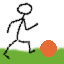

This is a cell attachment: 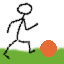

In the Jupyter Notebook, there is a speciall "Attachments" cell toolbar which you can use to see all attachments of a cell and delete them, if needed.

## HTML Elements (HTML only)

It is allowed to use plain HTML elements within Markdown cells.
Those elements are passed through to the HTML output and are ignored for the LaTeX output.
Below are a few examples.

HTML5 [audio](https://developer.mozilla.org/en-US/docs/Web/HTML/Element/audio) elements can be created like this:

```html
<audio src="https://example.org/audio.ogg" controls>alternative text</audio>
```

Example:

<audio src="https://upload.wikimedia.org/wikipedia/commons/6/61/DescenteInfinie.ogg" controls>The HTML audio element is not supported!</audio>


HTML5 [video](https://developer.mozilla.org/en-US/docs/Web/HTML/Element/video) elements can be created like this:

```html
<video src="https://example.org/video.ogv" controls>alternative text</video>
```

Example:

<video src="https://upload.wikimedia.org/wikipedia/commons/4/42/Shepard_Calais_1906_FrenchGP.ogv" controls autoplay loop>The HTML video element is not supported!</video>

The alternative text is shown in browsers that don't support those elements. The same text is also shown in Sphinx's LaTeX output.

<div class="alert alert-info">

**Note:** You can also use local files for the `<audio>` and `<video>` elements, but you have to create a link to the source file somewhere, because only then are the local files copied to the HTML output directory!
You should do that anyway to make the audio/video file accessible to browsers that don't support the `<audio>` and `<video>` elements.

</div>

## Info/Warning Boxes

<div class="alert alert-warning">

Warning

This is an *experimental feature*!
Its usage will probably change in the future or it might be removed completely!

</div>

Until there is an info/warning extension for Markdown/CommonMark (see [this issue](https://github.com/jupyter/notebook/issues/1292)), such boxes can be created by using HTML `<div>` elements like this:

```html
<div class="alert alert-info">

Note

This is a note!

</div>
```

For this to work reliably, you should obey the following guidelines:

* The `class` attribute has to be either `"alert alert-info"` or `"alert alert-warning"`, other values will not be converted correctly.
* No further attributes are allowed.
* For compatibility with CommonMark, you should add an empty line between the `<div>` start tag and the beginning of the content.

<div class="alert alert-info">

Note

The text can contain further Markdown formatting.
It is even possible to have nested boxes:

<div class="alert alert-warning">

... but please don't *overuse* this!

</div>
</div>

## Links to Other Notebooks

Relative links to local notebooks can be used:
[a link to a notebook in a subdirectory](subdir/a-notebook-in-a-subdir.ipynb),
[a link to an orphan notebook](orphan.ipynb)
(latter won't work in LaTeX output, because orphan pages are not included there).

This is how a link is created in Markdown:

```
[a link to a notebook in a subdirectory](subdir/a-notebook-in-a-subdir.ipynb)
```

Markdown also supports *reference-style* links:
[a reference-style link][mylink],
[another version of the same link][mylink].

[mylink]: subdir/a-notebook-in-a-subdir.ipynb

These can be created with this syntax:

```
[a reference-style link][mylink]

[mylink]: subdir/a-notebook-in-a-subdir.ipynb
```

Links to sub-sections are also possible, e.g.
[this subsection](subdir/a-notebook-in-a-subdir.ipynb#A-Sub-Section).

This link was created with:

```
[this subsection](subdir/a-notebook-in-a-subdir.ipynb#A-Sub-Section)
```

You just have to remember to replace spaces with hyphens!

BTW, links to sections of the current notebook work, too, e.g.
[beginning of this section](#Links-to-Other-Notebooks).

This can be done, as expected, like this:

```
[beginning of this section](#Links-to-Other-Notebooks)
```
It's also possible to create a
[link to the beginning of the current page](#),
by simply using a `#` character:

```
[link to the beginning of the current page](#)
```

## Links to `*.rst` Files (and Other Sphinx Source Files)

Links to files whose extension is in the configuration value [source_suffix](https://www.sphinx-doc.org/en/master/config.html#confval-source_suffix), will be converted to links to the generated HTML/LaTeX pages. Example: [A reStructuredText file](a-normal-rst-file.rst).

This was created with:

```
[A reStructuredText file](a-normal-rst-file.rst)
```

Links to sub-sections are also possible. Example: [Sphinx Directives](a-normal-rst-file.rst#sphinx-directives-for-info-warning-boxes).

This was created with:

```
[Sphinx Directives](a-normal-rst-file.rst#sphinx-directives-for-info-warning-boxes)
```

<div class="alert alert-info">

Note

Sphinx section anchors are different from Jupyter section anchors!
To create a link to a subsection in an `.rst` file (or another non-notebook source file), you not only have to replace spaces with hyphens, but also slashes and some other characters.
In case of doubt, just check the target HTML page generated by Sphinx.

</div>

## Links to Local Files

Links to local files (other than Jupyter notebooks and other Sphinx source files) are also possible, e.g. [requirements.txt](requirements.txt).

This was simply created with:

```
[requirements.txt](requirements.txt)
```

The linked files are automatically copied to the HTML output directory.
For LaTeX output, links are created,
but the files are not copied to the target directory.

## Links to Domain Objects

Links to [Sphinx domain objects](https://www.sphinx-doc.org/en/master/usage/restructuredtext/domains.html) (such as a Python class or JavaScript function) are also possible. For example:
[example_python_function()](a-normal-rst-file.rst#example_python_function).

This was created with:

```
[example_python_function()](a-normal-rst-file.rst#example_python_function)
```

This is especially useful for use with the Sphinx [autodoc](https://www.sphinx-doc.org/en/master/ext/autodoc.html) extension!